#### Hipotez testi

##### Tek örneklem testi

In [1]:
# Popülaasyon ortalaması ile varsayımsal bir değer arasında istatiksel olarak anlamlı bir farklılık olup olmadığı test edilmek için kullanılır

In [2]:
# Web sitesinde geçirilen süre 170 saniye midir?


In [8]:
import pandas as pd
import numpy as np

olcumler = np.array([17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119, 
              157, 145, 127, 244, 163, 114, 145,  65, 112, 185, 202, 146,
              203, 224, 203, 114, 188, 156, 187, 154, 177, 95, 165, 50, 110, 
              216, 138, 151, 166, 135, 155, 84, 251, 173, 131, 207, 121, 120])

In [6]:
import scipy.stats as stats
stats.describe(olcumler)

DescribeResult(nobs=50, minmax=(17, 251), mean=154.38, variance=2578.0363265306123, skewness=-0.32398897278694483, kurtosis=-0.05849823498415985)

###### Normallik varsayımı

<Axes: ylabel='Frequency'>

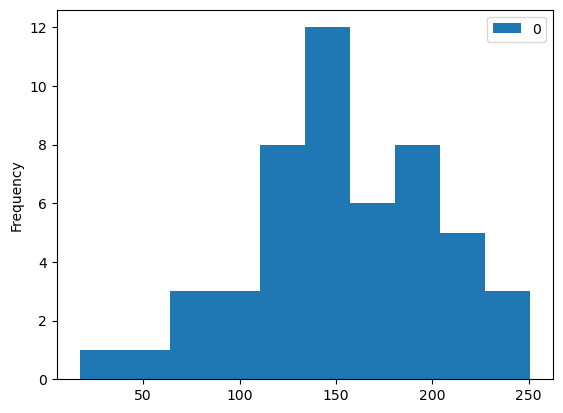

In [10]:
pd.DataFrame(olcumler).plot.hist()  # normal dağılım olmadığına grafiğe bakarak karar verebiliriz

##### qqplot testi

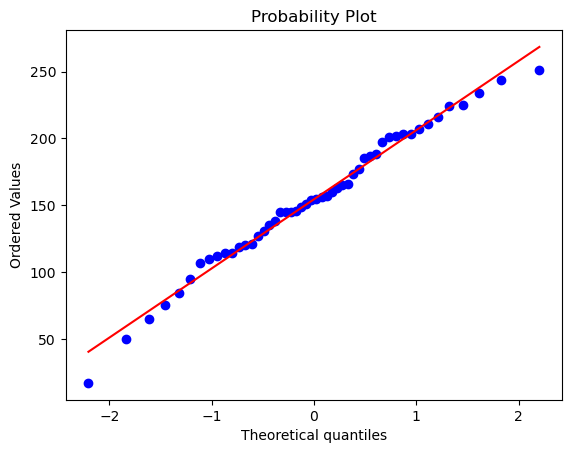

In [13]:
import pylab 
stats.probplot(olcumler , dist="norm",plot=pylab)
pylab.show()

# 

##### shapiro wilks testi

In [15]:
from scipy.stats import shapiro
shapiro(olcumler)

# ilk verilen değer test istatistiği , ikinci veri pvalue
# p value > 0.05 olcum reddeilemez

ShapiroResult(statistic=0.9853101372718811, pvalue=0.7848551869392395)

##### hipotez testi

In [18]:
stats.ttest_1samp(olcumler, popmean = 170)

TtestResult(statistic=-2.1753117985877966, pvalue=0.034460415195071446, df=49)

In [19]:
# p value < 0.05 h0 hipotezi reddedilir, web sitesinde geçirilen süre 170 saniyedir . 

##### nanparaparametrik tek örneklem testi

In [20]:
# normal dağılıma sahip değilse uygulanır.shapiro testi sağlanamazsa

In [24]:
from statsmodels.stats.descriptivestats import sign_test
sign_test(olcumler , 170)

# pvalue>0.05 ho reddedilmez

(-7.0, 0.06490864707227217)

##### tek örneklem oran testi

In [27]:
#  ->  Bir yazılım firmasında reklam verilmiştir ve dönüşüm oranı 0.125 tir.
#Bu durum kontrol edilmek isteniyor çünkü bu oran fazla yüksek ve gelirlerle örtüşmüyor.
#500 kişi reklama tıklamış , 40 kişi alışveriş yapmıştır. Bu durumdaki oran (40/500=0.08)

#ho=0.125
#h1!=0.125

In [31]:
from statsmodels.stats.proportion import proportions_ztest
count=40
nobs=500
value=0.125
proportions_ztest(count,nobs,value)

# p value < 0.05 ho hipotezi reddedilir

(-3.7090151628513017, 0.0002080669689845979)

#### Bağımsız Örneklem Testi

##### iki  grup ortalaması arasında karşılaştırma yapılmak istenildiğinde kullanılır.

In [32]:
# -> Bir Ml projesine yatırım yapılmıştır. Ürettiği tahminler neticesinde oluşan gelir ile eski sistemin ürettiği gelirler karşılaştrılıp anlamlı 
# farklılık olup olmadığı test edilmek isteniyor.
# A grubu eski , B grubu yeni sistem

# H0 = A=B
# H1= EŞİT DEĞİLLER


In [33]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])


A_B = pd.concat([A, B], axis = 1)
A_B.columns = ["A","B"]

A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


##### normallik varsayımı

In [35]:
from scipy.stats import shapiro
shapiro(A_B.A)

ShapiroResult(statistic=0.9789243936538696, pvalue=0.7962851524353027)

In [36]:
shapiro(A_B.B)

ShapiroResult(statistic=0.9561262130737305, pvalue=0.24584470689296722)

In [37]:
# İkisininde p value > 0.05 

##### varyans varsayımı

In [39]:
stats.levene(A_B.A ,A_B.B)

# P VALUE > 0.05 h0 REDDEİLEMEZ

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

##### hipotez testi

In [40]:
stats.ttest_ind(A_B["A"], A_B["B"] , equal_var=True)

TtestResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09, df=58.0)

In [41]:
# p value < 0.05
# hipotezi reddedilir

In [42]:
# normallik ve varyans sağlanmıyorsa:


##### nanparametrik test

In [43]:
stats.mannwhitneyu(A_B["A"], A_B["B"])

MannwhitneyuResult(statistic=89.5, pvalue=9.557950378612535e-08)

In [44]:
# p value < 0.05
# h0 reddedilir

#### Bağımlı iki örnek testi

#### Bağımlı iki grup ortalaması arasında karşılaştırma yapılmak istenildiğine kullanılır.

In [45]:
# -> Alınan bir eğitimin katma değer sağlayıp sağlamadığını ölçülmek isteniyor.
# Eğitimden önce ve sonra olacak şekilde gerekli ölçümler yapılıyor.
# Eğitim sonrasında eğitimin sağladığı katma değer ölçülmek isteniyor
# h0= hö=hs
# h1= eşit değiller

In [46]:
oncesi = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,
            121,118,124,121,125,115,115,119,118,121,117,117,120,120,
            121,117,118,117,123,118,124,121,115,118,125,115])

sonrasi = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,
             134,134,124,140,134,129,129,138,134,124,122,126,133,127,
             130,130,130,132,117,130,125,129,133,120,127,123])

In [47]:
#BIRINCI VERI SETI
AYRIK = pd.concat([oncesi, sonrasi], axis = 1)
AYRIK.columns = ["ONCESI","SONRASI"]
print("'AYRIK' Veri Seti: \n\n ", AYRIK.head(), "\n\n")


#IKINCI VERI SETI
#ONCESI FLAG/TAG'INI OLUSTURMA
GRUP_ONCESI = np.arange(len(oncesi))
GRUP_ONCESI = pd.DataFrame(GRUP_ONCESI)
GRUP_ONCESI[:] = "ONCESI"
#FLAG VE ONCESI DEGERLERINI BIR ARAYA GETIRME
A = pd.concat([oncesi, GRUP_ONCESI], axis = 1)
#SONRASI FLAG/TAG'INI OLUSTURMA
GRUP_SONRASI = np.arange(len(sonrasi))
GRUP_SONRASI = pd.DataFrame(GRUP_SONRASI)
GRUP_SONRASI[:] = "SONRASI"

#FLAG VE SONRASI DEGERLERINI BIR ARAYA GETIRME
B = pd.concat([sonrasi, GRUP_SONRASI], axis = 1)

#TUM VERIYI BIR ARAYA GETIRME
BIRLIKTE = pd.concat([A,B])
BIRLIKTE

#ISIMLENDIRME
BIRLIKTE.columns = ["PERFORMANS","ONCESI_SONRASI"]
print("'BIRLIKTE' Veri Seti: \n\n", BIRLIKTE.head(), "\n")

'AYRIK' Veri Seti: 

     ONCESI  SONRASI
0     123      118
1     119      127
2     119      122
3     116      132
4     123      129 


'BIRLIKTE' Veri Seti: 

    PERFORMANS ONCESI_SONRASI
0         123         ONCESI
1         119         ONCESI
2         119         ONCESI
3         116         ONCESI
4         123         ONCESI 



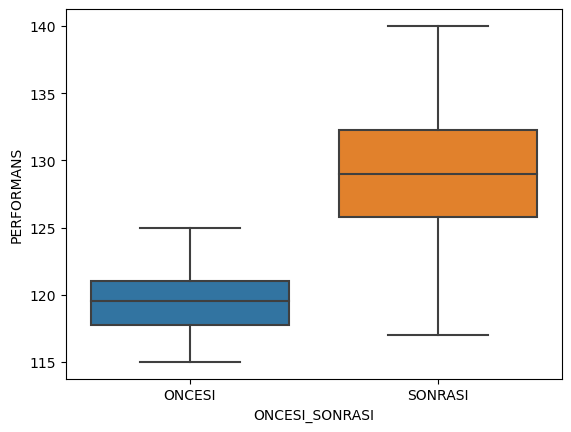

In [48]:
import seaborn as sns
sns.boxplot(x = "ONCESI_SONRASI", y = "PERFORMANS", data = BIRLIKTE);

In [50]:
# normallik varsayımı kontrolü

from scipy.stats import shapiro
shapiro(AYRIK.ONCESI)

ShapiroResult(statistic=0.9543651342391968, pvalue=0.10722016543149948)

In [51]:
shapiro(AYRIK.SONRASI)


ShapiroResult(statistic=0.9780092239379883, pvalue=0.6159630417823792)

In [52]:
# P VALUE > 0.05
# HO REDDETMİYORUZ

In [54]:
# VARYANS VARSAYIMI

import scipy.stats as stats
stats.levene(AYRIK.ONCESI , AYRIK.SONRASI)

LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

In [55]:
# p value < 0.05

# ho reddedilir

In [56]:
# hipotez testi

stats.ttest_rel(AYRIK.ONCESI, AYRIK.SONRASI)

TtestResult(statistic=-9.281533480429937, pvalue=2.0235251764440722e-11, df=39)

In [57]:
# p value < 0.05

# ho reddedilir

In [59]:
# nanparametrik testi

stats.wilcoxon (AYRIK.ONCESI , AYRIK.SONRASI)
# P VALUE <0.05
# HO REDDEDİLİR

WilcoxonResult(statistic=15.0, pvalue=2.491492033374464e-07)

#### İKİ ÖRNEKLEM ORAN TESTİ

In [60]:
# -> Kırmızı butona mı yeşil butona tıklsnmış buton renginin kullanıcı davranışına etkisi gözlemleniyor

# yeşil buton : 1000 görünteleme - 300 tık

# kırmızı buton : 1100 görüntülenme - 250 tık

In [64]:
from statsmodels.stats.proportion import proportions_ztest
basarisayisi=np.array([300,250])
gozlemsayisi=np.array([1000,1100])
proportions_ztest(count=basarisayisi,nobs=gozlemsayisi)

(3.7857863233209255, 0.0001532232957772221)

In [65]:
# p value < 0.05
# ho reddedilir

# buton renginin kullanıcı davranışına etkisi farklıdır ve yeşil butonun lehinedir.

#### Varyans analizi

In [66]:
# ana sayfada geçirilen süre arttırlmak isteniyor

# A : DOĞAL ŞEKİLDE
# B : YÖNLENDİRİ
# C : FARK VARDIR

# HO= AYNIDIR
# H1= FARKLIDIR


In [67]:
A = pd.DataFrame([28,33,30,29,28,29,27,31,30,32,28,33,25,29,27,31,31,30,31,34,30,32,31,34,28,32,31,28,33,29])

B = pd.DataFrame([31,32,30,30,33,32,34,27,36,30,31,30,38,29,30,34,34,31,35,35,33,30,28,29,26,37,31,28,34,33])

C = pd.DataFrame([40,33,38,41,42,43,38,35,39,39,36,34,35,40,38,36,39,36,33,35,38,35,40,40,39,38,38,43,40,42])

dfs = [A, B, C]

ABC = pd.concat(dfs, axis = 1)
ABC.columns = ["GRUP_A","GRUP_B","GRUP_C"]
ABC.head()

,GRUP_A,GRUP_B,GRUP_C
0,28,31,40
1,33,32,33
2,30,30,38
3,29,30,41
4,28,33,42


In [69]:
# normallik kontrolü

from scipy.stats import shapiro
shapiro(ABC["GRUP_A"])

# p value > 0.05

ShapiroResult(statistic=0.969743013381958, pvalue=0.5321670174598694)

In [70]:
shapiro(ABC["GRUP_B"])

# p value > 0.05

ShapiroResult(statistic=0.9789853096008301, pvalue=0.7979751229286194)

In [71]:
shapiro(ABC["GRUP_C"])

# P VALUE > 0.05

ShapiroResult(statistic=0.9579201340675354, pvalue=0.273820161819458)

In [72]:
# HO REDDEDİLMEZ

In [74]:
# VARYANS KONTROLÜ

stats.levene(ABC["GRUP_A"], ABC["GRUP_B"],ABC["GRUP_C"])

# P VALUE > 0.05

LeveneResult(statistic=1.0267403645055275, pvalue=0.36247110117417064)

In [76]:
# Hipotez testi

from scipy.stats import f_oneway
f_oneway(ABC["GRUP_A"], ABC["GRUP_B"],ABC["GRUP_C"])

F_onewayResult(statistic=74.69278140730431, pvalue=1.3079050746811477e-19)

In [77]:
# p value < 0.05 ho reddedilir

##### Korelasyon Analizi

##### Değişkenler arasındaki ilişki , bu ilişkinin yönü ve şiddeti ile ilgili bilgiler sağlayan yöntemdir

In [78]:
import seaborn as sns
tips = sns.load_dataset('tips')
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


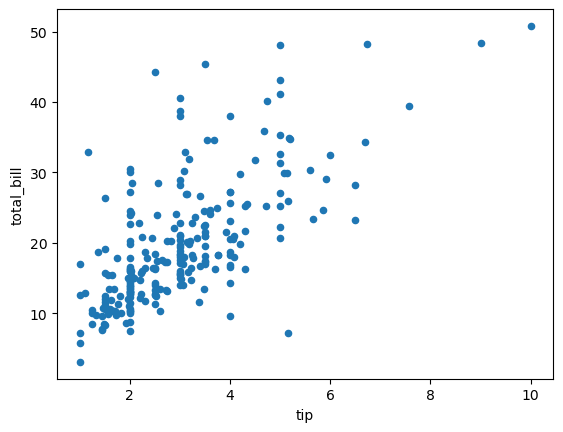

In [79]:
df.plot.scatter("tip","total_bill");

In [83]:
# ödenen ücret arttıkça verilen bahşiş artmış

##### korelasyon katsayısı

In [81]:
df["tip"].corr(df["total_bill"])

0.6757341092113641

In [82]:
df["tip"].corr(df["total_bill"], method = "spearman")

0.6789681219001009

In [84]:
from scipy.stats.stats import pearsonr
test_istatistigi, pvalue = pearsonr(df["tip"],df["total_bill"])

print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayısı = 0.6757, p-değeri = 0.0000


C:\Users\beyza\AppData\Local\Temp\ipykernel_2208\2593780886.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [85]:
from scipy.stats import stats
stats.spearmanr(df["tip"],df["total_bill"])

C:\Users\beyza\AppData\Local\Temp\ipykernel_2208\1772174929.py:2: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  stats.spearmanr(df["tip"],df["total_bill"])


SignificanceResult(statistic=0.6789681219001009, pvalue=2.501158440923619e-34)

In [86]:
test_istatistigi, pvalue = stats.spearmanr(df["tip"],df["total_bill"])

print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayısı = 0.6790, p-değeri = 0.0000


C:\Users\beyza\AppData\Local\Temp\ipykernel_2208\2659120856.py:1: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  test_istatistigi, pvalue = stats.spearmanr(df["tip"],df["total_bill"])


In [87]:
test_istatistigi, pvalue = stats.kendalltau(df["tip"],df["total_bill"])

print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayısı = 0.5172, p-değeri = 0.0000


C:\Users\beyza\AppData\Local\Temp\ipykernel_2208\2170992299.py:1: DeprecationWarning: Please use `kendalltau` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  test_istatistigi, pvalue = stats.kendalltau(df["tip"],df["total_bill"])
